In [2]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPRegressor as mlp
from keras.layers import Dense, Dropout, Activation
from keras.models import Sequential
import matplotlib.pyplot as plt
%matplotlib inline

Using Theano backend.


In [3]:
## Data preparation

In [4]:
data= pd.read_csv('/Users/arshiyaaggarwal/Desktop/Fms_Project/code/data/^DJI.csv')
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
4271,2017-11-27,23552.859375,23638.919922,23545.019531,23580.779297,23580.779297,296320000
4272,2017-11-28,23625.189453,23849.609375,23617.109375,23836.710938,23836.710938,319240000
4273,2017-11-29,23883.259766,23959.759766,23872.589844,23940.679688,23940.679688,401410000
4274,2017-11-30,24013.800781,24327.820313,24013.800781,24272.349609,24272.349609,488200000
4275,2017-12-01,24305.400391,24322.060547,23921.900391,24231.589844,24231.589844,417910000


In [5]:
data= data.dropna(axis=0)
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
4271,2017-11-27,23552.859375,23638.919922,23545.019531,23580.779297,23580.779297,296320000
4272,2017-11-28,23625.189453,23849.609375,23617.109375,23836.710938,23836.710938,319240000
4273,2017-11-29,23883.259766,23959.759766,23872.589844,23940.679688,23940.679688,401410000
4274,2017-11-30,24013.800781,24327.820313,24013.800781,24272.349609,24272.349609,488200000
4275,2017-12-01,24305.400391,24322.060547,23921.900391,24231.589844,24231.589844,417910000


In [6]:
data= data.values[:, 1:5]
print data.shape

(4276, 4)


In [7]:
print data[:6, :]

[[10377.330078 10604.459961 10319.30957 10560.950195]
 [10576.780273 10917.299805 10576.780273 10898.719727]
 [10896.139648 10896.139648 10620.860352 10664.379883]
 [10644.660156 10689.019531 10583.230469 10617.360352]
 [10632.139648 10803.540039 10631.860352 10712.910156]
 [10719.360352 10792.160156 10670.05957 10725.799805]]


In [8]:
y= data[1:, 3]
print y.shape
X= data[:4275,:]
print X.shape

(4275,)
(4275, 4)


In [9]:
y= (y- min(y))/(max(y)- min(y))

In [10]:
print y[4270:]
print y[:7]

[0.9609839991623761 0.9754227755909837 0.9812883322331646 1.0
 0.9977004752838762]
[0.2455061392540156 0.2322854972004963 0.2296328181756039
 0.2350234070545823 0.23575059639087165 0.23814659118191125
 0.23962306262608365]


In [11]:
X= (X- np.min(X,axis=0))/(np.max(X, axis=0)-np.min(X,axis=0))
print X.shape
print X[:7, 3]

(4275, 4)
[0.22645035256860355 0.2455061392540156 0.2322854972004963
 0.2296328181756039 0.2350234070545823 0.23575059639087165
 0.23814659118191125]


In [12]:
split = int(0.8*data.shape[0])
X_train = X[:split]
X_test = X[split:]

y_train = y[:split]
y_test = y[split:]

print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(3420, 4) (3420,)
(855, 4) (855,)


In [13]:
## Model fitting and score calculation

In [14]:
model= mlp(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', verbose=True)

In [15]:
model.fit(X_train, y_train)

Iteration 1, loss = 0.00201374
Iteration 2, loss = 0.00016774
Iteration 3, loss = 0.00008106
Iteration 4, loss = 0.00005977
Iteration 5, loss = 0.00005388
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 50), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=True, warm_start=False)

In [16]:
y_pred= model.predict(X_test)

In [18]:
rmse= (((y_pred - y_test)**2).sum())/y_pred.size
print rmse

0.00246168388985


In [19]:
## To show how well the trend of y_test has been tracked by y_pred

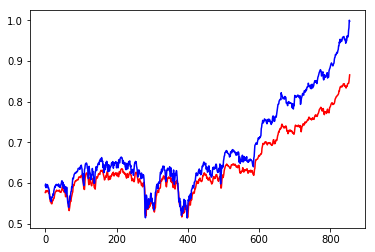

In [20]:
plt.plot(y_pred, 'r-')
plt.plot(y_test, 'b-')
plt.show()

In [21]:
## To show how similar y_pred and y_test are

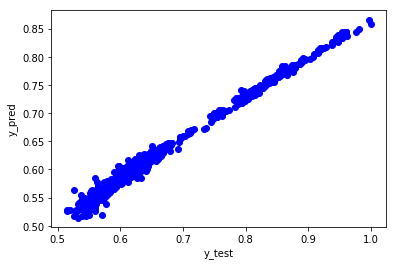

In [22]:
plt.plot(y_test, y_pred, 'bo')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [23]:
model.score(X_test, y_test)

0.79268164745009018

In [ ]:
#The score fluctuates between 75 to 85 based on the number of layers and random initialisation